#Assignment-6 Machine Learning Lab
**RollNo: 101803186, Name: Kulpreet Singh, Group: 3COE9**

#Q1: Multiclass Logistic Regression
Implement Multiclass Logistic Regression (step-by-step) on Iris
dataset using one vs. rest strategy?

In [4]:
#importing dataset
import numpy as np
import pandas as pd
from sklearn import datasets
iris=datasets.load_iris()
X=pd.DataFrame(iris.data, columns = iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y=pd.DataFrame(iris.target)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


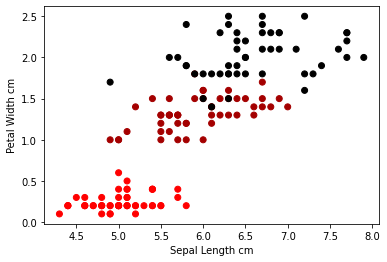

In [6]:
import matplotlib.pyplot as plt
x = X.values
y = y.values
plt.scatter(x[:,0], x[:, 3], c=y, cmap ='flag')
plt.xlabel('Sepal Length cm')
plt.ylabel('Petal Width cm')
plt.show()

In [7]:
#data preprocessing
y=np.array(y)
y=y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [8]:
#logistic regression procedure
def hypothesis(theta, X):
  #print("theta.shape: ",theta.shape,"X.shape: ",X.shape)R
  z=np.dot(X,theta)
  #print("z.shape: ",z.shape)I
  h=1/(1+np.exp(-z))
  return h
def cost(X, y, theta):
  y1 = hypothesis(theta,X)
  J=-(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))
  return J
def gradient_descent(X,y,alpha,iterations):
  theta=[]
  for i in range(X.shape[1]):
    theta.append([0])
  theta=np.array(theta)  
  #print(theta.shape)
  #print("theta: ",theta)
  for i in range(iterations):
    y1 = hypothesis(theta,X)
    #print("y1.shape: ",y1.shape)N
    partial_derivative=(1/len(X))*(np.dot(X.T,(y1-y)))
    #print("partial_derivative.shape: ",partial_derivative.shape)Z
    #print("theta.shape: ",theta.shape)L
    theta=theta-(alpha*partial_derivative)
  return theta
def fit(X,y,alpha,iterations):
  print("Fitting the given dataset..")
  theta__=[]
  #cost__=[]
  X=np.insert(X, 0, 1, axis=1)
  m=len(y)
  for i in np.unique(y):
    print('Descending the gradient for label type ' + str(i) + ' vs Rest')
    y_onevsall=np.where(y == i, 1, 0)
    theta=[]
    theta=gradient_descent(X,y_onevsall,alpha,iterations)
    #cost__.append((cost(X,y_onevsall,theta),i))E
    theta__.append((theta))
  return theta__

In [9]:
#Split the dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Fit the dataset in logistic regression procedure.
theta__=fit(X_train,Y_train,0.1,30000)

Fitting the given dataset..
Descending the gradient for label type 0 vs Rest
Descending the gradient for label type 1 vs Rest
Descending the gradient for label type 2 vs Rest


We have the theta for each i vs Rest.

In [10]:
print(len(theta__))
theta__

3


[array([[-2.46688149],
        [-2.46688149],
        [-1.99984895],
        [ 2.81079799],
        [-4.2876011 ],
        [-3.82027555]]), array([[-0.54946772],
        [-0.54946772],
        [-0.1256841 ],
        [-1.48460785],
        [ 1.820633  ],
        [-1.78903856]]), array([[-5.89569342],
        [-5.89569342],
        [-1.13383637],
        [-2.16203172],
        [ 9.26664591],
        [ 8.51816915]])]

In [11]:
#preprocess the X_test
X_test1 = np.insert(X_test, 0, values=1, axis=1)

Predict the y for 0 vs Rest.

In [12]:
y_predict=X_test1.dot(theta__[0])
print(y_predict.shape)

(45, 1)


In [13]:
Y_predict0=hypothesis(theta__[0],X_test1)
Y_label0=np.zeros(len(Y_predict0))
for i in range(len(Y_predict0)):
  if(Y_predict0[i]>=0.5):
    Y_label0[i]=1

In [14]:
np.unique(Y_label0)

array([0., 1.])

In [15]:
Y_test1=[]
for i in range(len(Y_test)):
  Y_test1.append(Y_test[i][0])
Y_test1=np.array(Y_test1)
Y_test1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [16]:
TP=0
TN=0
FP=0
FN=0
Y_test1=np.array(Y_test1).reshape(-1,1)
for i in range(len(Y_label0)):
  if ((Y_test1[i]==1 or Y_test1[i]==2) and Y_label0[i]==1):
    TP=TP+1
  if ((Y_test1[i]==1 or Y_test1[i]==2) and Y_label0[i]==0):
    FN=FN+1
  if (Y_test1[i]==0 and Y_label0[i]==1):
    FP=FP+1
  if (Y_test1[i]==0 and Y_label0[i]==0):
    TN=TN+1
print("TP: ",TP,"\nTN: ",TN,"\nFP: ",FP,"\nFN: ",FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
try:
  print("accuracy: ",accuracy)
  #For positive class:R
  precision_pos=TP/(TP+FP)
  recall_pos=TP/(TP+FN)
  f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
  print(precision_pos,recall_pos,f1_score_pos)
  #For negative classH
  precision_neg=TN/(TN+FN)
  recall_neg=TN/(TN+FP)
  f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
  print(precision_neg,recall_neg,f1_score_neg)

except:
  print("The values which are not given are infinite")

TP:  0 
TN:  0 
FP:  19 
FN:  26
accuracy:  0.0
The values which are not given are infinite


Predict the y for 1 vs Rest.

In [17]:
Y_predict1=hypothesis(theta__[1],X_test1)
Y_label1=np.zeros(len(Y_predict1))
for i in range(len(Y_predict1)):
  if(Y_predict1[i]>=0.5):
    Y_label1[i]=1

In [18]:
Y_label1

array([1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
TP=0
TN=0
FP=0
FN=0
Y_test1=np.array(Y_test1).reshape(-1,1)
for i in range(len(Y_label1)):
  if(Y_test1[i]==2 and Y_label1[i]==1):
    TP=TP+1
  if(Y_test1[i]==2 and Y_label1[i]==0):
    FN=FN+1
  if((Y_test1[i]==0 or Y_test1[i]==1) and Y_label1[i]==1):
    FP=FP+1
  if((Y_test1[i]==0 or Y_test1[i]==1) and Y_label1[i]==0):
    TN=TN+1
print("TP: ",TP,"TN: ",TN,"FP: ",FP,"FN: ",FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy: ",accuracy)
#For positive class:A
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("\nprecision_pos: ",precision_pos,"\nrecall_pos: ",recall_pos,"\nf1_score_pos: ", f1_score_pos)
#For negative class R
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("\nprecision_neg: ", precision_neg,"\nrecall_neg: ",recall_neg,"\nf1_score_neg: ",f1_score_neg)

TP:  3 TN:  26 FP:  6 FN:  10
accuracy:  0.6444444444444445

precision_pos:  0.3333333333333333 
recall_pos:  0.23076923076923078 
f1_score_pos:  0.27272727272727276

precision_neg:  0.7222222222222222 
recall_neg:  0.8125 
f1_score_neg:  0.7647058823529411


Predict the y for 2 vs Rest.

In [20]:
Y_predict2=hypothesis(theta__[2],X_test1)
Y_label2=np.zeros(len(Y_predict2))
for i in range(len(Y_predict2)):
  if(Y_predict2[i]>=0.5):
    Y_label2[i]=1

In [21]:
Y_label2

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [22]:
TP=0
TN=0
FP=0
FN=0
Y_test1=np.array(Y_test1).reshape(-1,1)
for i in range(len(Y_label2)):
  if (Y_test1[i]==2 and Y_label2[i]==1):
    TP=TP+1
  if (Y_test1[i]==2 and Y_label2[i]==0):
    FN=FN+1
  if ((Y_test1[i]==0 or Y_test1[i]==1) and Y_label2[i]==1):
    FP=FP+1
  if ((Y_test1[i]==0 or Y_test[i]==1) and Y_label2[i]==0):
    TN=TN+1
print("TP: ",TP,"TN: ",TN,"FP: ",FP,"FN: ",FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy: ",accuracy)
#For positive class S
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("\nprecision_pos: ",precision_pos,"\nrecall_pos: ",recall_pos,"\nf1_score_pos: ", f1_score_pos)
#For negative class H
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("\nprecision_neg: ", precision_neg,"\nrecall_neg: ",recall_neg,"\nf1_score_neg: ",f1_score_neg)

TP:  13 TN:  32 FP:  0 FN:  0
accuracy:  1.0

precision_pos:  1.0 
recall_pos:  1.0 
f1_score_pos:  1.0

precision_neg:  1.0 
recall_neg:  1.0 
f1_score_neg:  1.0


In [23]:
macro_precision=(precision_pos+precision_neg)/2
macro_recall=(recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print("macro_precision: ",macro_precision,"\nmacro_recall: ",macro_recall,"\nmacro_f1_score: ",macro_f1_score)

macro_precision:  1.0 
macro_recall:  1.0 
macro_f1_score:  1.0


In [24]:
#Weighted Average:
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print("weighted_precision: ",weighted_precision,"\nweighted_recall: ",weighted_recall,"\nweighted_f1_score: ",weighted_f1_score)

weighted_precision:  1.0 
weighted_recall:  1.0 
weighted_f1_score:  1.0


In [25]:
# Logistic regression with In-built fuction
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression(multi_class="multinomial", solver="sag")
#sag denote Stochastic Average Gradient
model=lr.fit(X_train,Y_train)
Y_label_inbuilt=model.predict(X_test)
print(metrics.classification_report(Y_test,Y_label_inbuilt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
metrics.accuracy_score(Y_test, Y_label_inbuilt)*100

100.0

In [28]:
Y_label_inbuilt

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

#Q2: Ridge Logistic Regression
Download the exam dataset from the following link:
https://drive.google.com/file/d/1wH6ofvNGPmORFlCLt72WGhJYPZiXstYh/view?usp=sharing

The dataset labels that whether or not the student will get
admission on the basis of the two exam scores.
The plot of the data against exam1 and exam2

As clear from the figure, a linear decision boundary does not
fit well. So, fit a Logistic Regression Classifier with
polynomial function of test1 and test2 scores upto degree 6
using


In [30]:
dataset=pd.read_csv("/content/drive/MyDrive/Machine Learning Lab/exam.csv", names = ['Exam1', 'Exam2', 'Result'])
print(dataset)

        Exam1     Exam2  Result
0    0.051267  0.699560       1
1   -0.092742  0.684940       1
2   -0.213710  0.692250       1
3   -0.375000  0.502190       1
4   -0.513250  0.465640       1
..        ...       ...     ...
113 -0.720620  0.538740       0
114 -0.593890  0.494880       0
115 -0.484450  0.999270       0
116 -0.006336  0.999270       0
117  0.632650 -0.030612       0

[118 rows x 3 columns]


In [31]:
X=dataset.drop(['Result'],axis=1)
def mapFeature(X1, X2):
    degree = 6  #pol. func of 6 degrees R
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))[:,np.newaxis]))
    return out
X = mapFeature(X.iloc[:,0], X.iloc[:,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


In [32]:
Y=dataset.iloc[:,2]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

(i) Step-by-Step Logistic Regression (with no regularization; alpha=10; number of iterations=1000)

In [34]:
n=1000  #no. of iterations I
alpha=10
m,k=X_train.shape
beta=np.zeros(k)
for i in range(n):
  cost_gradient=np.zeros(k)
  z=X_train.dot(beta)
  predicted=1/(1+np.exp(-z))
  difference=predicted-Y_train
  for j in range(k):
    cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
  for j in range(k):
    beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
print(beta) # N

[  6.39362011   0.           6.59045005  21.38690493 -21.53798653
 -15.60810878 -18.06730834  11.84940635   8.19388602  -2.23227157
  -1.14754793 -11.82131432   1.1574889   -1.88236682  -7.17676875
 -17.39471624   4.04723808  -2.86623889  15.45050612  -4.21007462
  -5.46824427  -5.74889001  -9.21912964   0.6294782    1.40730222
   1.47040908  -9.98294056  -3.79066828 -11.69809637]


In [35]:
Y_predict=1/(1+np.exp(-(X_test.dot(beta))))
Y_label=np.zeros(len(Y_predict))
for i in range(len(Y_predict)): # Z
  if Y_predict[i]>=0.5:
    Y_label[i]=1

In [36]:
TP=0
TN=0
FP=0
FN=0
Y_test=np.array(Y_test).reshape(-1,1)
for i in range(len(Y_label)):
  if (Y_test[i]==1 and Y_label[i]==1):
    TP=TP+1
  if (Y_test[i]==1 and Y_label[i]==0):
    FN=FN+1
  if (Y_test[i]==0 and Y_label[i]==1):
    FP=FP+1
  if (Y_test[i]==0 and Y_label[i]==0):
    TN=TN+1
print(TP,TN,FP,FN)

19 11 5 1


In [37]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy: ',accuracy)
#For positive class: L
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print('Precision_pos: ',precision_pos,'\nRecall_pos: ',recall_pos,'\nF1_score_pos: ',f1_score_pos)

#For negative class: E
try:
  precision_neg=TN/(TN+FN)
  recall_neg=TN/(TN+FP)
  f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
  print('Precision_neg: ',precision_neg,'\nRecall_neg: ',recall_neg,'\nF1_score_neg: ',f1_score_neg)
except:
  pass

Accuracy:  0.8333333333333334
Precision_pos:  0.7916666666666666 
Recall_pos:  0.95 
F1_score_pos:  0.8636363636363635
Precision_neg:  0.9166666666666666 
Recall_neg:  0.6875 
F1_score_neg:  0.7857142857142857


In [38]:
try:
  macro_precision=(precision_pos+precision_neg)/2
  macro_recall=(recall_pos+recall_neg)/2
  macro_f1_score=(f1_score_pos+f1_score_neg)/2
  print("Macro_precision: ",macro_precision,'\nMacro Recall: ',macro_recall,'\nMacro F1 score: ',macro_f1_score)
except:
  pass

Macro_precision:  0.8541666666666666 
Macro Recall:  0.81875 
Macro F1 score:  0.8246753246753247


In [39]:
#Weighted Average: R
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print(weighted_precision,weighted_recall,weighted_f1_score)

0.8472222222222222 0.8333333333333334 0.829004329004329





(ii) Step-by-Step Logistic Regression (with ridge
regularization; alpha=10; number of iterations=1000;
lambda=0.2)

In [40]:
dataset=pd.read_csv("/content/drive/MyDrive/Machine Learning Lab/exam.csv", names = ['Exam1', 'Exam2', 'Result'])
print(dataset)

        Exam1     Exam2  Result
0    0.051267  0.699560       1
1   -0.092742  0.684940       1
2   -0.213710  0.692250       1
3   -0.375000  0.502190       1
4   -0.513250  0.465640       1
..        ...       ...     ...
113 -0.720620  0.538740       0
114 -0.593890  0.494880       0
115 -0.484450  0.999270       0
116 -0.006336  0.999270       0
117  0.632650 -0.030612       0

[118 rows x 3 columns]


In [41]:
X=dataset.drop(['Result'],axis=1)
def mapFeature(X1, X2):
    degree = 6  #pol. func of 6 degrees R
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))[:,np.newaxis]))
    return out
X = mapFeature(X.iloc[:,0], X.iloc[:,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


In [42]:
Y=dataset.iloc[:,2]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [44]:
n=1000  #no. of iterations I
ld=0.2
alpha=10
m,k=X_train.shape
beta2=np.zeros(k)
for i in range(n):
  cost_gradient=np.zeros(k)
  z=X_train.dot(beta2)
  predicted=1/(1+np.exp(-z))
  difference=predicted-Y_train
  for j in range(k):
    cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
  for j in range(k):
    beta2[j]=(beta2[j]*(1-alpha*ld/m))-((alpha/m)*cost_gradient[j])
print(beta2) # N

[  6.36473239   0.           1.87822285   9.2473579  -11.00182025
  -2.79290033  -5.41530664   1.93342849   1.1918536    0.11982645
   1.75145827  -7.00591381   0.75710096  -6.93073343   0.8609409
  -4.87557089   0.49257739  -0.06286224   1.73066968   0.18299609
   1.14152197  -0.80153778  -4.52740464   1.56699169  -5.29155829
   0.77041812  -4.09270277   2.03993467  -3.55594054]


In [45]:
Y_predict=1/(1+np.exp(-(X_test.dot(beta2)))) 
Y_label=np.zeros(len(Y_predict))
for i in range(len(Y_predict)): # Z
  if Y_predict[i]>=0.5:
    Y_label[i]=1

In [46]:
TP=0
TN=0
FP=0
FN=0
Y_test=np.array(Y_test).reshape(-1,1)
for i in range(len(Y_label)):
  if (Y_test[i]==1 and Y_label[i]==1):
    TP=TP+1
  if (Y_test[i]==1 and Y_label[i]==0):
    FN=FN+1
  if (Y_test[i]==0 and Y_label[i]==1):
    FP=FP+1
  if (Y_test[i]==0 and Y_label[i]==0):
    TN=TN+1
print(TP,TN,FP,FN)

20 1 15 0


In [47]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy: ',accuracy)
#For positive class: L
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print('Precision_pos: ',precision_pos,'\nRecall_pos: ',recall_pos,'\nF1_score_pos: ',f1_score_pos)

#For negative class: E
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print('Precision_neg: ',precision_neg,'\nRecall_neg: ',recall_neg,'\nF1_score_neg: ',f1_score_neg)

Accuracy:  0.5833333333333334
Precision_pos:  0.5714285714285714 
Recall_pos:  1.0 
F1_score_pos:  0.7272727272727273
Precision_neg:  1.0 
Recall_neg:  0.0625 
F1_score_neg:  0.11764705882352941


In [48]:
try:
  macro_precision=(precision_pos+precision_neg)/2
  macro_recall=(recall_pos+recall_neg)/2
  macro_f1_score=(f1_score_pos+f1_score_neg)/2
  print("Macro_precision: ",macro_precision,'\nMacro Recall: ',macro_recall,'\nMacro F1 score: ',macro_f1_score)
except:
  pass

Macro_precision:  0.7857142857142857 
Macro Recall:  0.53125 
Macro F1 score:  0.42245989304812837


In [49]:
#Weighted Average: R
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print('Weighted_precision: ',weighted_precision,'\nWeighted_recall: ',weighted_recall,'\nWeighted_f1_score: ',weighted_f1_score)

Weighted_precision:  0.7619047619047619 
Weighted_recall:  0.5833333333333334 
Weighted_f1_score:  0.4563279857397505
